In [109]:
import pandas as pd

In [110]:
df = pd.read_csv("../data/raw/iris_original.csv")

In [111]:
pd.options.display.float_format = '{:.2f}'.format

In [112]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [113]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica


In [114]:
df.shape

(150, 5)

In [115]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [116]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [118]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [119]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [120]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [121]:
df.rename(columns={
          "sepal_length":"sepalo_longitud",
          "sepal_width":"sepalo_ancho",
          "petal_length":"petalo_longitud",
          "petal_width":"petalo_ancho",
          "species":"especie"
        },inplace=True)

In [122]:
df.describe()

,sepalo_longitud,sepalo_ancho,petalo_longitud,petalo_ancho
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [123]:
df[df["petalo_ancho"] > 1 ]

,sepalo_longitud,sepalo_ancho,petalo_longitud,petalo_ancho,especie
50,7.00,3.20,4.70,1.40,versicolor
51,6.40,3.20,4.50,1.50,versicolor
52,6.90,3.10,4.90,1.50,versicolor
53,5.50,2.30,4.00,1.30,versicolor
54,6.50,2.80,4.60,1.50,versicolor
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica


In [124]:
filtro = (df["petalo_ancho"] > 1) & (df["especie"] == "versicolor")

In [125]:
print(filtro)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [126]:
df.groupby("especie")["petalo_ancho"].sum().reset_index()

,especie,petalo_ancho
0,setosa,12.30
1,versicolor,66.30
2,virginica,101.30


In [127]:
df["radio"] = df["petalo_longitud"] / df["sepalo_longitud"]

In [128]:
df.describe()

,sepalo_longitud,sepalo_ancho,petalo_longitud,petalo_ancho,radio
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,0.62
std,0.83,0.44,1.77,0.76,0.24
min,4.30,2.00,1.00,0.10,0.21
25%,5.10,2.80,1.60,0.30,0.31
50%,5.80,3.00,4.35,1.30,0.71
75%,6.40,3.30,5.10,1.80,0.81
max,7.90,4.40,6.90,2.50,0.95


In [129]:
import matplotlib.pyplot as plt

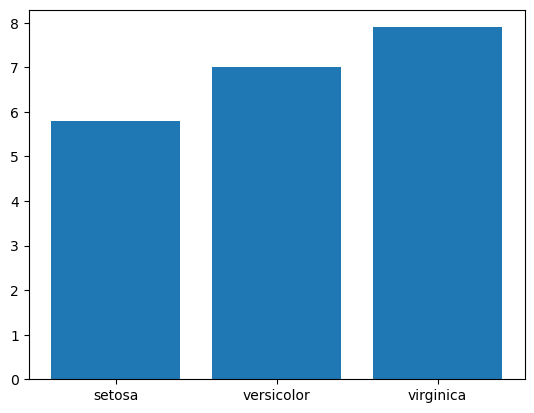

In [130]:
x = df.especie
y = df.sepalo_longitud
plt.bar(x, y)
plt.show()

In [132]:
df.to_csv("../data/processed/datos_limpios_para_BI.csv", index=False)